In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score


%matplotlib inline

In [2]:
bikedf = pd.read_csv("C:\\Users\\saaip\\Downloads\\bike_share.csv")

In [3]:
bikedf


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [5]:
bikedf.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
bikedf.duplicated().value_counts()

False    10865
True        21
dtype: int64

In [7]:
bikedf.drop_duplicates(inplace = True)

In [8]:
bikedf.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10865.0,2.507225,1.115713,1.00,2.0000,3.000,4.0000,4.0000
holiday,10865.0,0.028624,0.166755,0.00,0.0000,0.000,0.0000,1.0000
workingday,10865.0,0.680718,0.466220,0.00,0.0000,1.000,1.0000,1.0000
weather,10865.0,1.418776,0.634125,1.00,1.0000,1.000,2.0000,4.0000
temp,10865.0,20.245132,7.786636,0.82,13.9400,20.500,26.2400,41.0000
atemp,10865.0,23.669358,8.470159,0.76,16.6650,24.240,31.0600,45.4550
humidity,10865.0,61.873355,19.243612,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10865.0,12.810235,8.163516,0.00,7.0015,12.998,16.9979,56.9969
casual,10865.0,36.091210,49.983868,0.00,4.0000,17.000,49.0000,367.0000
registered,10865.0,155.846111,151.036698,0.00,37.0000,119.000,223.0000,886.0000


In [9]:
X = bikedf.drop(columns=['casual', 'count', 'registered'])

In [10]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,0,1,9.84,14.395,81,0.0000
1,1,0,0,1,9.02,13.635,80,0.0000
2,1,0,0,1,9.02,13.635,80,0.0000
3,1,0,0,1,9.84,14.395,75,0.0000
4,1,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027
10882,4,0,1,1,14.76,17.425,57,15.0013
10883,4,0,1,1,13.94,15.910,61,15.0013
10884,4,0,1,1,13.94,17.425,61,6.0032


<AxesSubplot:>

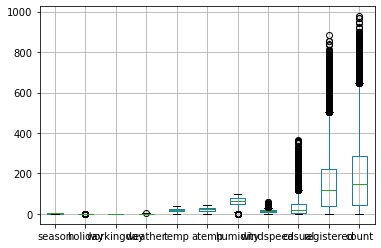

In [11]:
bikedf.boxplot()

<AxesSubplot:>

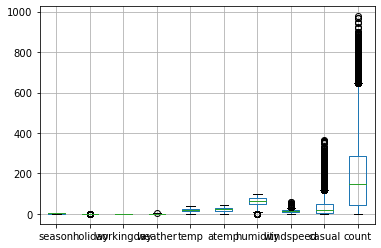

In [12]:
bikedf.drop(columns = "registered").boxplot()

In [13]:
for col_name in bikedf.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = bikedf[col_name].quantile(0.25)
    q3 = bikedf[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",bikedf.loc[(bikedf[col_name] < low) | (bikedf[col_name] > high), col_name])

season
Outliers =  Series([], Name: season, dtype: int64)
holiday
Outliers =  372      1
373      1
374      1
375      1
376      1
        ..
10257    1
10258    1
10259    1
10260    1
10261    1
Name: holiday, Length: 311, dtype: int64
workingday
Outliers =  Series([], Name: workingday, dtype: int64)
weather
Outliers =  5631    4
Name: weather, dtype: int64
temp
Outliers =  Series([], Name: temp, dtype: float64)
atemp
Outliers =  Series([], Name: atemp, dtype: float64)
humidity
Outliers =  1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    0
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
Name: humidity, dtype: int64
windspeed
Outliers =  175      32.9975
178      36.9974
194      35.0008
196      35.0008
265      39.0007
          ...   
10013    32.9975
10154    32.9975
10263    43.0006
10540    32.9975
10853    32.9975
Name: windspeed, Length: 227, dtype: float6

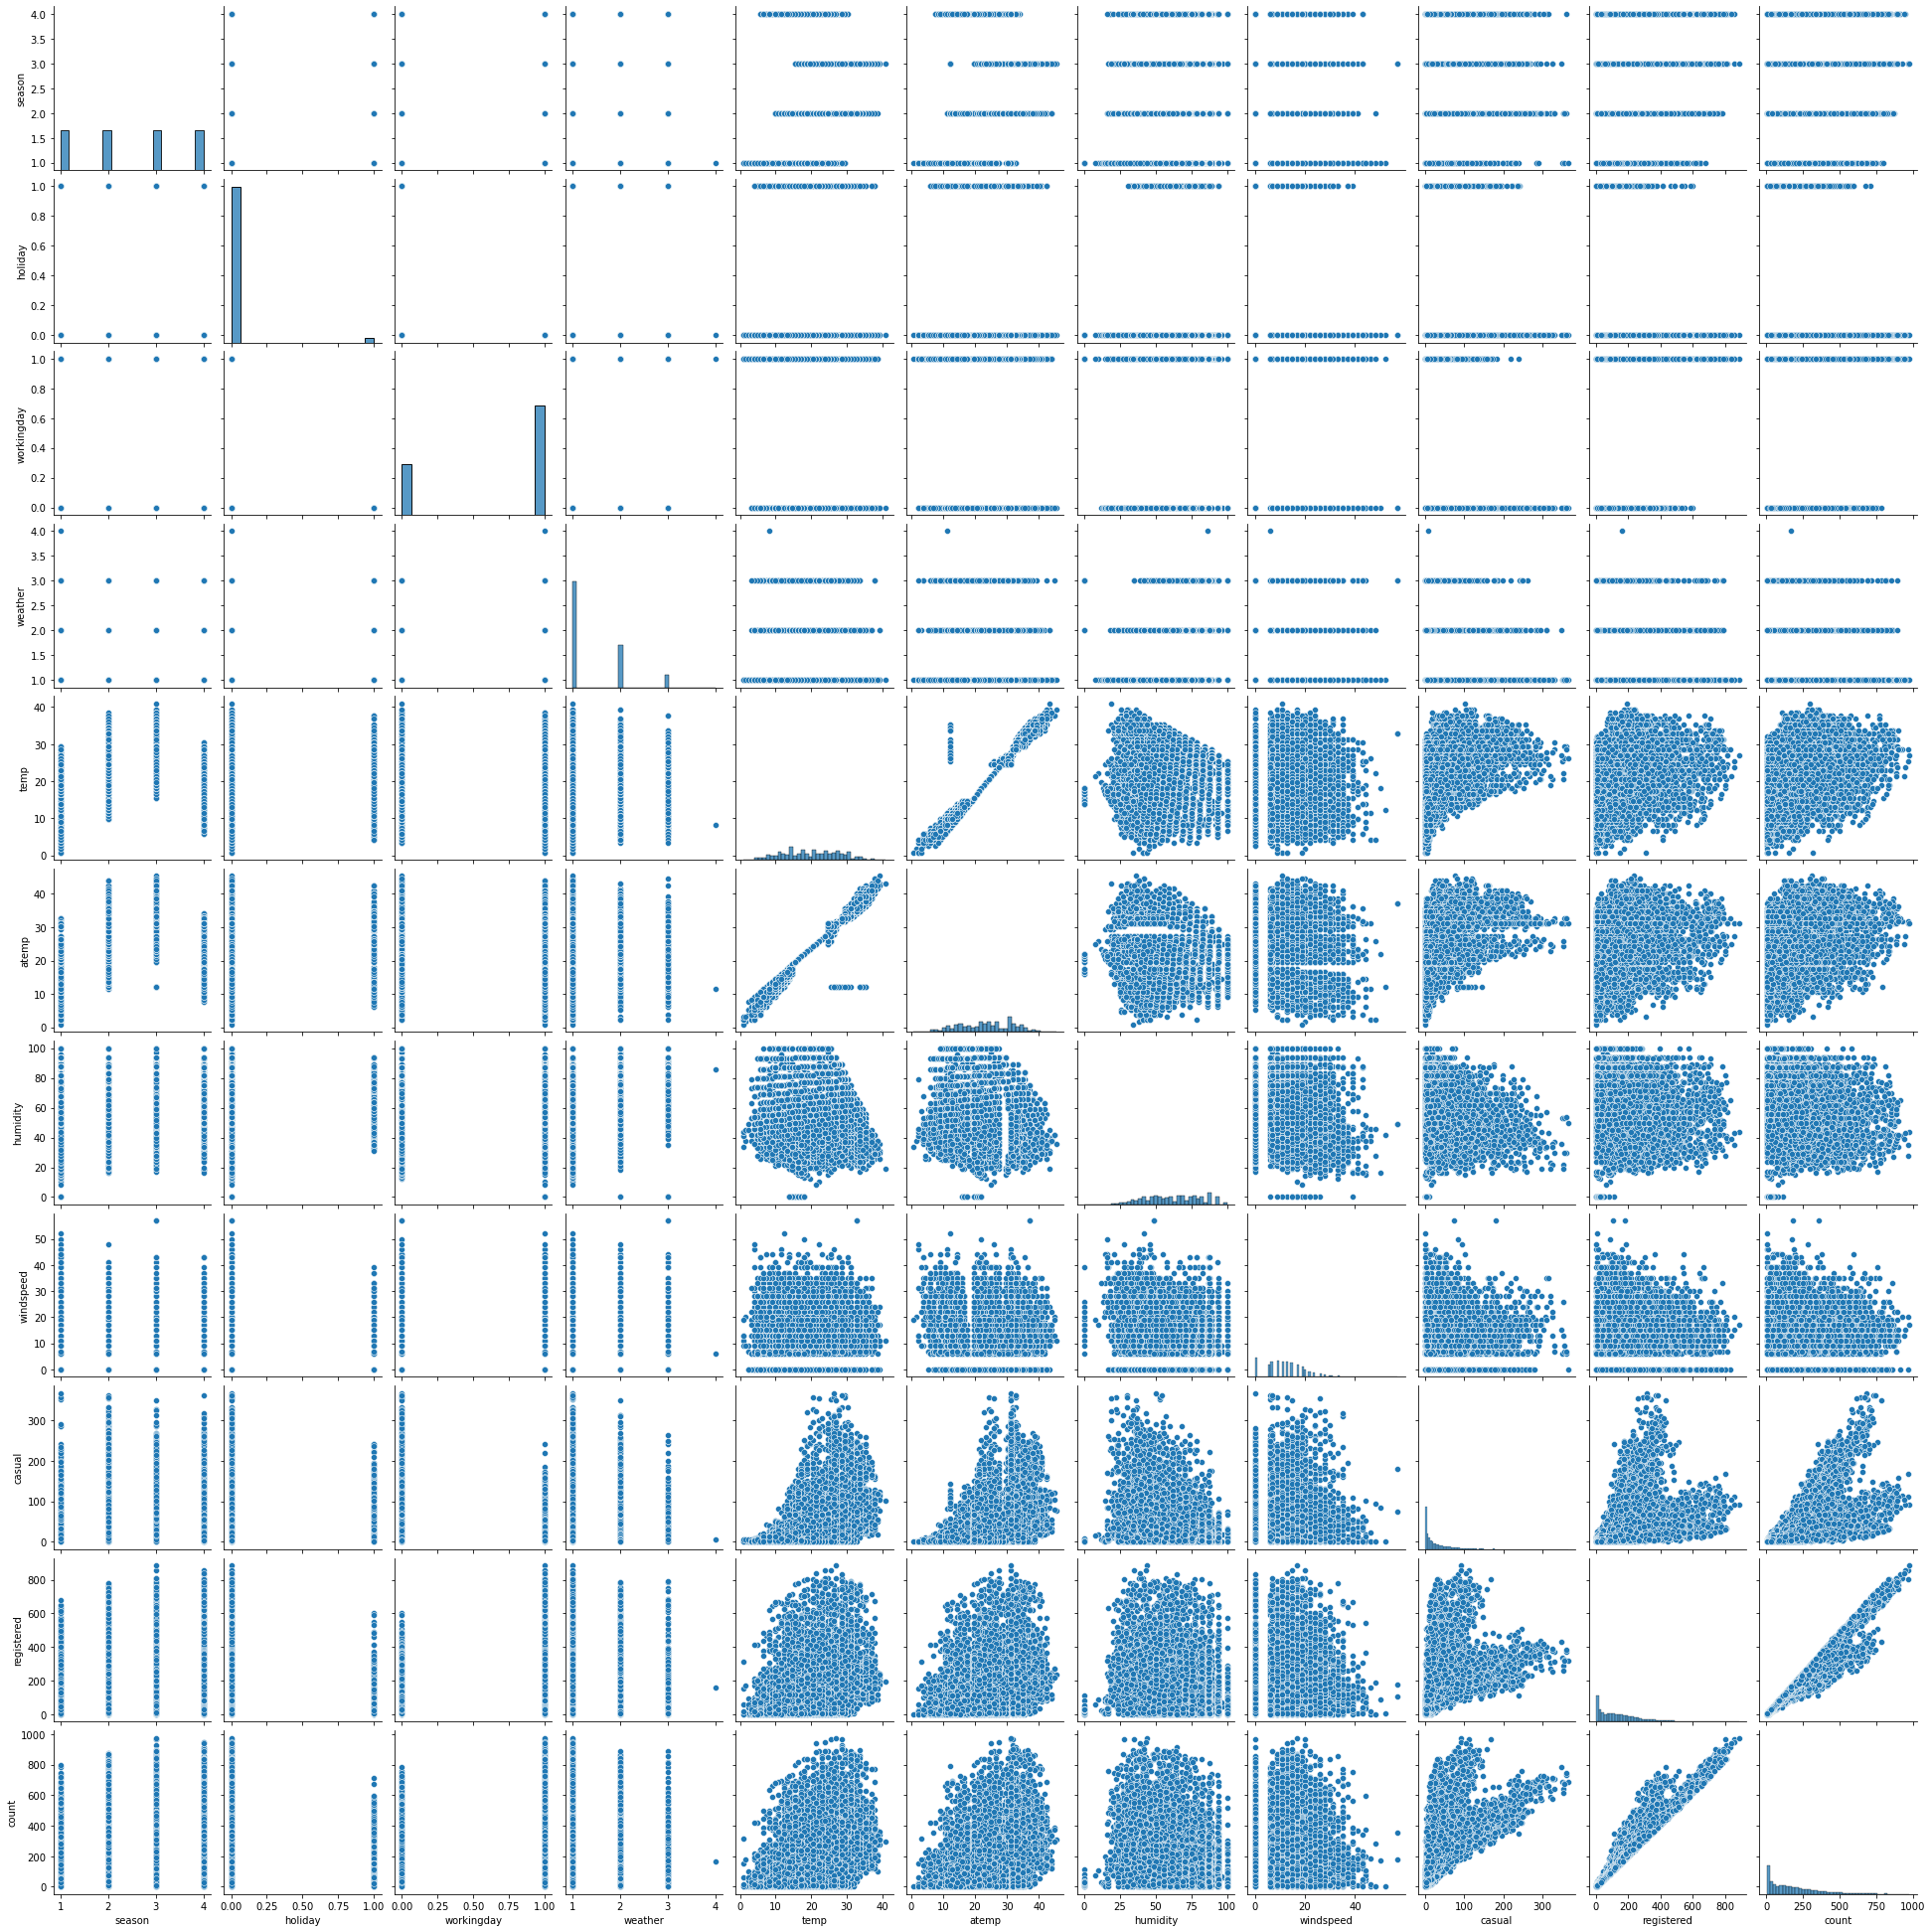

In [14]:
sns.pairplot(bikedf)

In [15]:

bikedf.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029315,-0.008394,0.008603,0.258008,0.264052,0.189819,-0.147440,0.096536,0.163820,0.163241
holiday,0.029315,1.000000,-0.250650,-0.007172,-0.000020,-0.005512,0.002048,0.008190,0.043584,-0.021311,-0.005743
workingday,-0.008394,-0.250650,1.000000,0.033854,0.030122,0.024722,-0.011607,0.014285,-0.319295,0.120018,0.011967
weather,0.008603,-0.007172,0.033854,1.000000,-0.055684,-0.056001,0.406642,0.007071,-0.136453,-0.110057,-0.129427
temp,0.258008,-0.000020,0.030122,-0.055684,1.000000,0.984920,-0.065301,-0.018937,0.466756,0.317530,0.393577
atemp,0.264052,-0.005512,0.024722,-0.056001,0.984920,1.000000,-0.043934,-0.058440,0.461769,0.313697,0.389005
humidity,0.189819,0.002048,-0.011607,0.406642,-0.065301,-0.043934,1.000000,-0.317920,-0.348238,-0.265321,-0.317337
windspeed,-0.147440,0.008190,0.014285,0.007071,-0.018937,-0.058440,-0.317920,1.000000,0.091474,0.089907,0.100212
casual,0.096536,0.043584,-0.319295,-0.136453,0.466756,0.461769,-0.348238,0.091474,1.000000,0.496587,0.690036
registered,0.163820,-0.021311,0.120018,-0.110057,0.317530,0.313697,-0.265321,0.089907,0.496587,1.000000,0.970890


<AxesSubplot:>

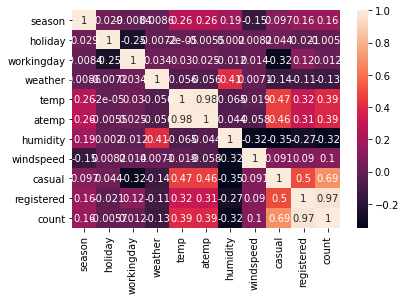

In [16]:
sns.heatmap(bikedf.corr(), annot=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
X.corr() 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
season,1.000000,0.029315,-0.008394,0.008603,0.258008,0.264052,0.189819,-0.147440
holiday,0.029315,1.000000,-0.250650,-0.007172,-0.000020,-0.005512,0.002048,0.008190
workingday,-0.008394,-0.250650,1.000000,0.033854,0.030122,0.024722,-0.011607,0.014285
weather,0.008603,-0.007172,0.033854,1.000000,-0.055684,-0.056001,0.406642,0.007071
temp,0.258008,-0.000020,0.030122,-0.055684,1.000000,0.984920,-0.065301,-0.018937
atemp,0.264052,-0.005512,0.024722,-0.056001,0.984920,1.000000,-0.043934,-0.058440
humidity,0.189819,0.002048,-0.011607,0.406642,-0.065301,-0.043934,1.000000,-0.317920
windspeed,-0.147440,0.008190,0.014285,0.007071,-0.018937,-0.058440,-0.317920,1.000000


In [19]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature         VIF
0      season    6.590907
1     holiday    1.092327
2  workingday    3.135881
3     weather    7.311950
4        temp  263.949707
5       atemp  288.235847
6    humidity   11.610282
7   windspeed    3.008751


In [20]:
X = X.drop(columns=["temp"])

In [21]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature        VIF
0      season   6.590167
1     holiday   1.091849
2  workingday   3.135302
3     weather   7.311950
4       atemp   7.448888
5    humidity  11.094396
6   windspeed   2.977465


In [24]:
y = bikedf['count']

In [25]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10865, dtype: int64

In [26]:
model = LinearRegression()
model.fit(X,y)


LinearRegression()

In [27]:
model.intercept_

133.67000810337612

In [56]:
def linear_best_fit(X,y):
    model = LinearRegression()    
    model.fit(X,y)
    print(model.intercept_)
    print(model.coef_)
    y_pred = model.predict(X)
    print("MSE : ",mean_squared_error(y,y_pred))
    print("MAE : ",mean_absolute_error(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

def mean_absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / (y+0.01))) * 100

In [57]:
predict = model.predict(X)

In [32]:
actual = y

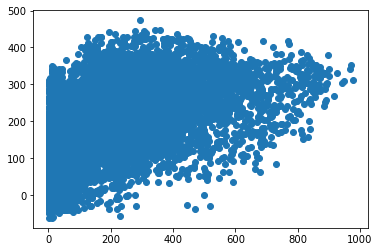

In [29]:
plt.scatter(y,predict)

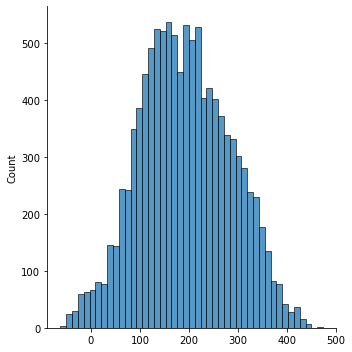

In [30]:
sns.displot(predict)

In [33]:
error = actual - predict

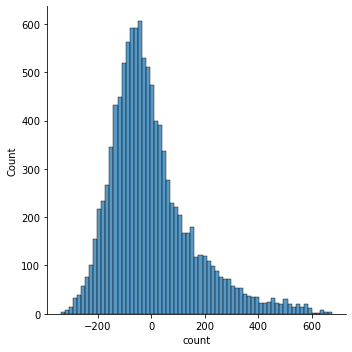

In [34]:
sns.displot(error)

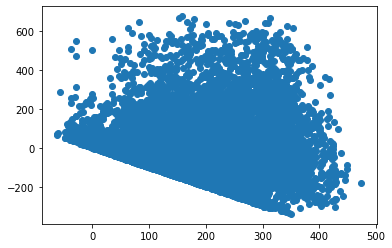

In [35]:
plt.scatter(predict, error)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

In [37]:
X_train.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed
5504,1,0,1,2,6.060,42,6.0032
8370,3,0,1,1,31.820,79,0.0000
9981,4,0,1,1,16.665,61,11.0014
225,1,0,1,1,10.605,40,8.9981
955,1,0,1,2,9.850,74,6.0032


In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
model.coef_

array([23.68857796, -0.73655975,  1.9859396 ,  7.54213227,  7.08465439,
       -3.08338964,  0.937602  ])

In [41]:
model.intercept_

131.06367399909323

In [42]:

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
a= mean_squared_error(y_train, train_pred, squared=False)
b = mean_squared_error(y_test, test_pred, squared=False)
((b-a)/b)*100

0.9005943911783422

In [45]:
i=1
test_result = []
for train_index, test_index in kf.split(X):
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    train_mape = np.sqrt(mean_squared_error(train_y, train_pred))
    test_mape = np.sqrt(mean_squared_error(test_y, test_pred))
    print("Train MAPE = ",train_mape)
    print("Test MAPE = ",test_mape)
    
    test_result.append(test_mape)

Train MAPE =  161.4690988239725
Test MAPE =  97.71718182331976
Train MAPE =  159.75959428065315
Test MAPE =  116.07708435423983
Train MAPE =  156.1088834822192
Test MAPE =  158.6347917448071
Train MAPE =  158.12875478025657
Test MAPE =  135.08437926004765
Train MAPE =  159.51285085743152
Test MAPE =  121.40991769476572
Train MAPE =  158.59427304397553
Test MAPE =  130.99302790738142
Train MAPE =  150.90185246754507
Test MAPE =  196.8181587645325
Train MAPE =  150.29412299250305
Test MAPE =  199.44338699016348
Train MAPE =  147.79229125259246
Test MAPE =  217.29611414296832
Train MAPE =  152.14497485238218
Test MAPE =  192.08631373692617


In [54]:
kf = KFold(n_splits=10)

In [46]:
X.shape

(10865, 7)

In [47]:
X.reset_index(inplace=True)

In [48]:
X.shape

(10865, 8)

In [49]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10865, dtype: int64

In [65]:
i = 1
test_result = []
for train_index, test_index in kf.split(X):
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X  = X.iloc[test_index]
    test_y  = y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(train_X, train_y)
    
    train_pred = model.predict(train_X)
    test_pred  = model.predict(test_X)
    
    train_mape = mean_absolute_percentage_error(train_y, train_pred)
    test_mape = mean_absolute_percentage_error(test_y, test_pred)
    
    print(i, 'fold')
    print('Train MAPE =', train_mape)
    print('Test Mape  =', test_mape)
    i+=1
    
    test_result.append(test_mape)

1 fold
Train MAPE = 452.49816715542465
Test Mape  = 489.5562202353817
2 fold
Train MAPE = 471.4508062451069
Test Mape  = 351.953641180958
3 fold
Train MAPE = 478.0257660857913
Test Mape  = 443.42606232617004
4 fold
Train MAPE = 477.1283061505253
Test Mape  = 404.4108120453329
5 fold
Train MAPE = 475.941093731193
Test Mape  = 351.7703774695841
6 fold
Train MAPE = 445.7900394400601
Test Mape  = 713.8778078563541
7 fold
Train MAPE = 450.58727011286015
Test Mape  = 603.9418663411634
8 fold
Train MAPE = 475.5079211085115
Test Mape  = 495.11195511351235
9 fold
Train MAPE = 475.1538638624601
Test Mape  = 427.18991251606076
10 fold
Train MAPE = 464.75636728236157
Test Mape  = 477.57816729284184


In [66]:
np.mean(test_result)

475.8816822377359

In [63]:

model = LinearRegression()

In [67]:
np.mean(np.abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=10)))

4.7740856751801175